# Applying dimensional embedding to Lattice QCD

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("seaborn-deep")

### Import the data

In [14]:
#?pd.read_csv

We are going to import the plaquettes at flow time $t=0$ in `plaqs`, and the plaquettes at $t=t_0$ with $t_0^2 E= 0.16$ in `plaqs_flowed`. `plaqs` should have $8^4\times6$ columns (one per plaquette), and `plaqs_flowed` has one additional column: the topological charge $Q(t_0)$

In [2]:
# Plaquettes at t=0
file = '/home/david/Documents/Universidad/3-Doctorado/Doctorado_trabajo/Codes/27-ML/plaqdataframe.csv'
plaqs = pd.read_csv(file, header=None, delim_whitespace=True)

#Plaquettes at t = t_0
file_flowed = '/home/david/Documents/Universidad/3-Doctorado/Doctorado_trabajo/Codes/27-ML/plaq_flowed_dataframe.csv'
plaqs_flowed = pd.read_csv(file_flowed, header=None, delim_whitespace=True)

In [3]:
plaqs.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24566,24567,24568,24569,24570,24571,24572,24573,24574,24575
0,1.608126,1.765325,1.564415,1.676063,0.417098,1.691840,-0.222513,1.604446,0.310597,0.612803,...,0.658545,1.743705,0.735081,0.925147,1.880717,1.548970,1.792773,1.586063,1.803331,1.320986
1,0.821091,1.413627,1.714694,1.843578,1.843695,1.571072,0.772807,1.094406,0.261695,1.911604,...,1.366275,1.647109,0.269714,1.797805,0.929206,1.370439,1.259463,1.086933,0.386009,1.803658
2,1.113060,0.811744,1.236591,1.492413,1.336905,1.833861,1.484474,1.360245,0.830724,1.330731,...,1.391231,1.381277,0.659895,0.886537,1.115082,1.478257,1.259284,0.854103,1.513743,1.525182
3,0.848079,1.574586,1.363207,1.683470,1.887478,1.779369,1.538897,1.361437,0.271654,1.639752,...,1.616249,0.569438,1.283261,0.522904,1.429044,1.372929,1.846840,1.536339,-0.309595,1.091633
4,1.174621,1.498045,1.392578,1.793587,1.870188,1.191200,0.992130,1.319565,1.360264,0.964829,...,0.999139,-0.272332,1.494839,1.317033,1.030933,0.266682,1.752417,1.775711,1.530246,0.142369


In [4]:
plaqs_flowed.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24567,24568,24569,24570,24571,24572,24573,24574,24575,24576
0,0.900409,1.999626,1.999268,1.999290,1.999363,1.999404,1.995822,1.999558,1.998928,1.998244,...,1.999002,1.998382,1.998401,1.996553,1.998921,1.999587,1.999670,1.999664,1.998586,1.996710
1,-0.901083,1.996018,1.998401,1.998664,1.998743,1.997408,1.996008,1.996391,1.998634,1.998759,...,1.999771,1.998898,1.998124,1.997885,1.998496,1.999343,1.999863,1.999493,1.998234,1.997453
2,0.000415,1.998535,1.998236,1.997042,1.999583,1.998848,1.998749,1.999170,1.999380,1.997620,...,1.993262,1.999541,1.997815,1.994002,1.997365,1.995092,1.995309,1.999068,1.997772,1.996239
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.003655,1.999189,1.999430,1.996659,1.999812,1.999816,1.998836,1.998885,1.998364,1.995851,...,1.996427,1.999426,1.999333,1.998714,1.998725,1.999075,1.996301,1.999732,1.999481,1.998365


In `plaqs_flowed` there are rows with only zeroes due to the way in which the dataset was created, so we should erase them and check we have the same number of samples in both dataframes.

In [5]:
# Erase rows with only zeroes
plaqs_flowed = plaqs_flowed[(plaqs_flowed.T != 0).any()]
plaqs_flowed = plaqs_flowed.reset_index(drop=True)
print('Number of rows in plaqs_flowed is {} and in plaqs is {}.'.format(len(plaqs_flowed[0]),len(plaqs[0])) )

Number of rows in plaqs_flowed is 687 and in plaqs is 687.


Now we separate the topological charge of the samples in another dataframe

In [6]:
# Run this only once!
topcharges = plaqs_flowed[0]
topcharges_int = round(topcharges,0)
plaqs_flowed = plaqs_flowed.drop(0, axis=1)

In [7]:
plaqs_flowed.head(1)

,1,2,3,4,5,6,7,8,9,10,...,24567,24568,24569,24570,24571,24572,24573,24574,24575,24576
0,1.999626,1.999268,1.99929,1.999363,1.999404,1.995822,1.999558,1.998928,1.998244,1.998842,...,1.999002,1.998382,1.998401,1.996553,1.998921,1.999587,1.99967,1.999664,1.998586,1.99671


Distribution of topological charges:

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]), array([  1,  11,  79, 133, 218, 162,  72,  10,   1]))


(array([  1.,  11.,  79., 133., 218., 162.,  72.,  10.,   1.]),
 array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
         0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ]),
 <a list of 9 Patch objects>)

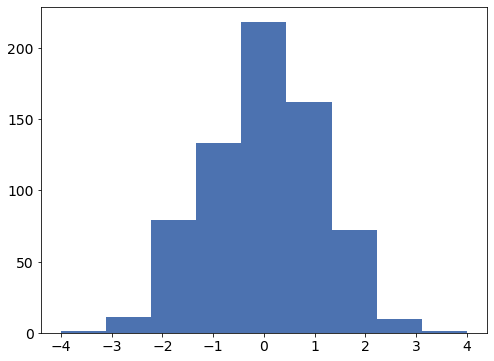

In [22]:
print(np.unique(topcharges_int, return_counts=True))
plt.hist(topcharges_int,bins=9)

## Embedding

In [8]:
from sklearn import decomposition
from sklearn import datasets
from sklearn import ensemble 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#from sklearn.metrics import accuracy_score, roc_auc_score


### Embedding of plaquettes configurations at $t=0$

Embedding of the configurations at $t=0$ to $d=2$ dimensions using PCA

In [96]:
X = plaqs[plaqs.columns]

Projecting 24576-dimensional data to 2D


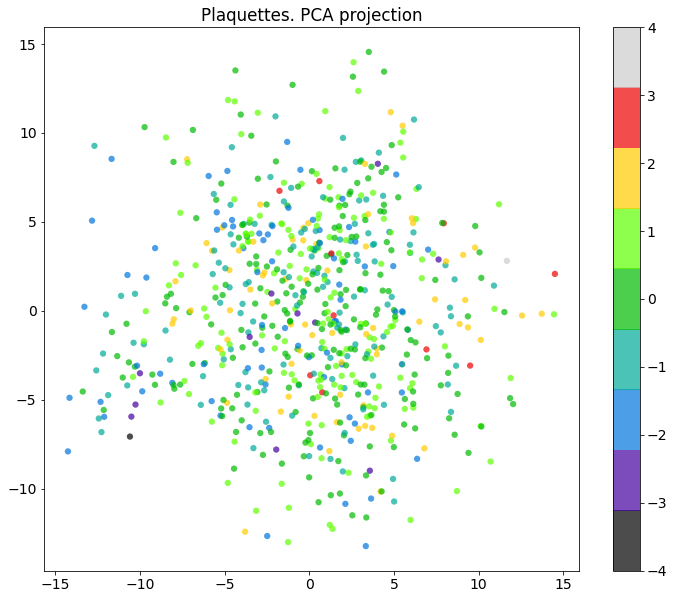

In [9]:
#This picks the n_components most important directions in your data, the ones which conserve the most correlation
pca = decomposition.PCA(n_components=2)

X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

# Note: we put the colors by doing c=y
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=topcharges_int,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',9))
plt.colorbar()
plt.title('Plaquettes. PCA projection');

Embedding of the configurations at $t=0$ to $d=2$ dimensions using t-SNE. Patterns appear, but there seems not to be any correlation with the topological charge at $t_0$. Maybe due to HMC chain?

In [97]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity=30, random_state=17)

X_tsne = tsne.fit_transform(X)



CPU times: user 38.3 s, sys: 383 ms, total: 38.6 s
Wall time: 28.2 s


In [ ]:
?TSNE

In [107]:
len(X_tsne[:,0])

687

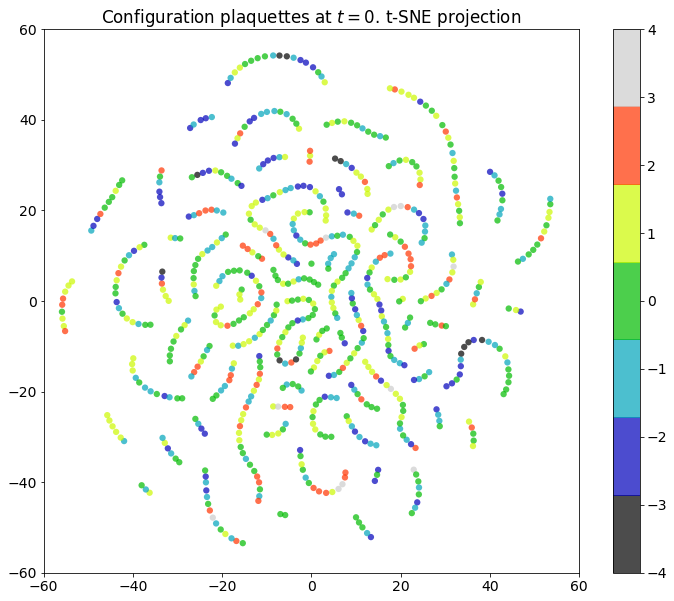

In [137]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            edgecolor='none', alpha=0.7, s=40, c=topcharges_int,
            cmap=plt.cm.get_cmap('nipy_spectral',7))
plt.colorbar()
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.title('Configuration plaquettes at $t=0$. t-SNE projection');

There seems to be no clustering no matter which embedding dimension one chooses.

In [66]:
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(X)

In [67]:
kmeans.cluster_centers_.shape

(7, 24576)

In [63]:
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([  8, 362,  97,  54, 166]))

In [64]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(topcharges_int[mask])[0]

In [65]:
np.unique(labels, return_counts=True)

(array([0, 1], dtype=int32), array([633,  54]))

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(topcharges_int, labels)

0.3231441048034934

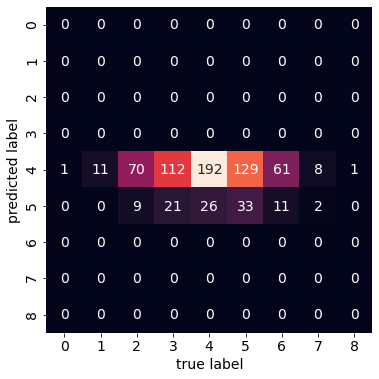

In [96]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(topcharges_int, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

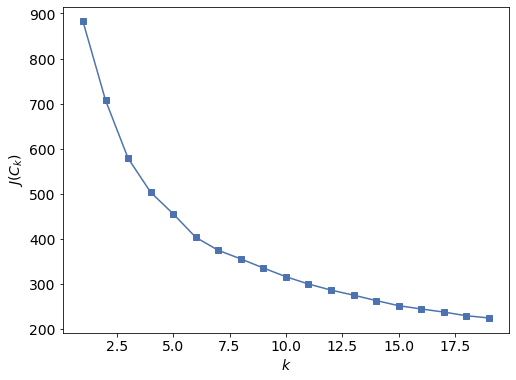

In [38]:
# Project the data: this step will take several seconds
#tsne = TSNE(n_components=2, perplexity=50, init='random', random_state=0)
#X_proj = tsne.fit_transform(X)

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_tsne)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Look more possible clustering algorithms on https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

Text(0.5, 1.0, 'Plaquettes. MDS projection')

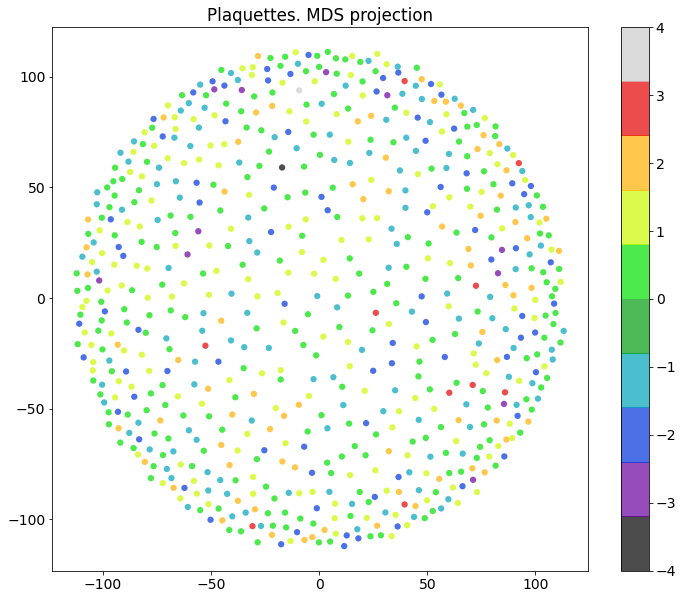

In [39]:
from sklearn.manifold import MDS
mds = MDS(n_components = 2, random_state=17)

X_mds = mds.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=topcharges_int,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Plaquettes. MDS projection')

### Embedding of plaquettes configurations at $t = t_0$

Now let's do the same with the flowed configurations.

In [88]:
X = plaqs_flowed[plaqs_flowed.columns]

In [89]:
X.shape

(687, 24576)

In [90]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, method='exact', perplexity=30, random_state=17)

X_tsne = tsne.fit_transform(X)

CPU times: user 54.6 s, sys: 996 ms, total: 55.6 s
Wall time: 31.6 s


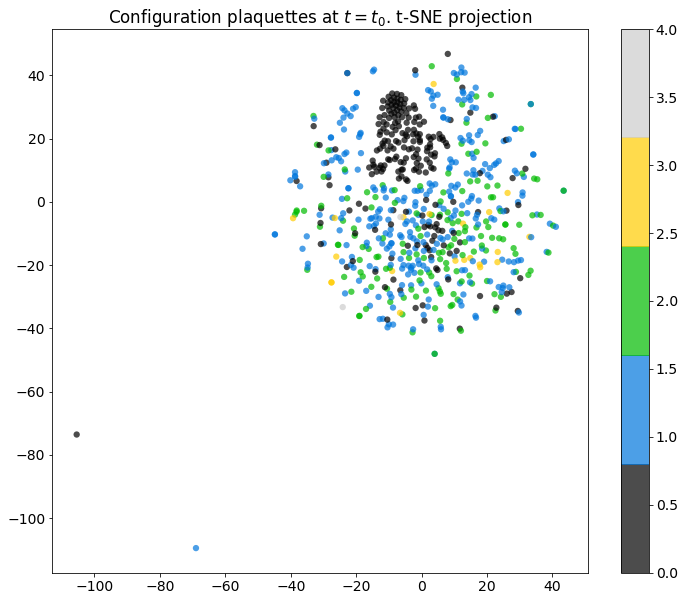

In [92]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=abs(topcharges_int),
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.colorbar()
#plt.xlim(-30,30)
#plt.ylim(-30,30)
plt.title('Configuration plaquettes at $t=t_0$. t-SNE projection');

Note: most of the configurations with $Q(t_0) = 0$ didn't arrive to $t^2 E = 0.16$, so they were flowed up to $t=6$.

Text(0.5, 1.0, 'Plaquettes. MDS projection')

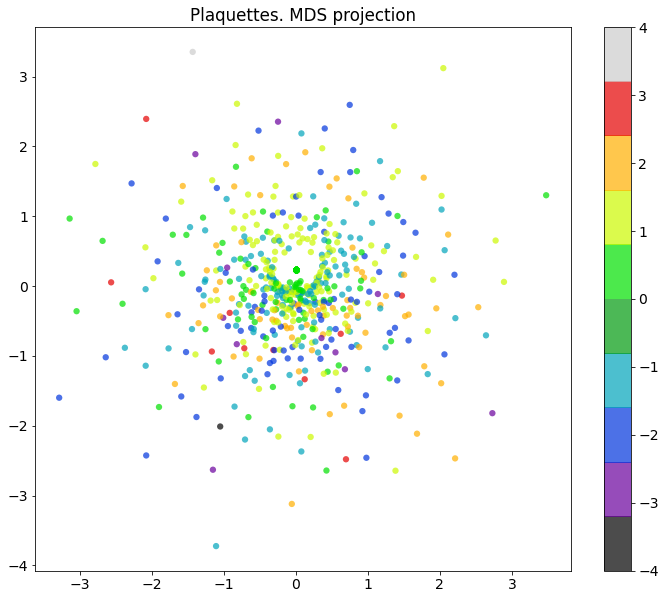

In [81]:
from sklearn.manifold import MDS
mds = MDS(n_components = 2, random_state=17)

X_mds = mds.fit_transform(X)


Text(0.5, 1.0, 'Plaquettes. MDS projection')

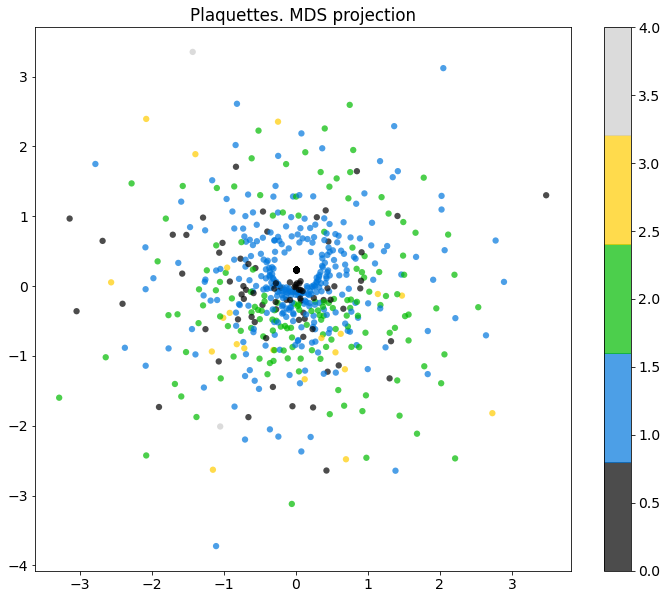

In [83]:

plt.figure(figsize=(12,10))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=abs(topcharges_int),
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.colorbar()
plt.title('Plaquettes. MDS projection')